<a href="https://colab.research.google.com/github/hanbinpark/DeepLearning/blob/main/ex04_%EA%B0%9C_%EA%B3%A0%EC%96%91%EC%9D%B4_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
# /content/drive/MyDrive/Colab Notebooks/DeepLearning/data/dogs_vs_cats_small
# 데이터 경로지정
train_dir = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/dogs_vs_cats_small/train'
valid_dir = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/dogs_vs_cats_small/validation'

train_dir_dog = os.path.join(train_dir,"dogs")
train_dir_cats = os.path.join(train_dir,"cats")
valid_dir_dog = os.path.join(valid_dir,"dogs")
valid_dir_cats = os.path.join(valid_dir,"cats")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(f"훈련데이터 개수 (개) : {len(os.listdir(train_dir_dog))}")
print(f"훈련데이터 개수 (고양이) : {len(os.listdir(train_dir_cats))}")
print(f"테스트데이터 개수 (개): {len(os.listdir(valid_dir_dog))}")
print(f"테스트데이터 개수 (고양이): {len(os.listdir(valid_dir_cats))}")

훈련데이터 개수 (개) : 1000
훈련데이터 개수 (고양이) : 1000
테스트데이터 개수 (개): 500
테스트데이터 개수 (고양이): 500


In [ ]:
# 하나의 변수에 이미지파일 전부 다 합치기
# 픽셀값 변경(0 ~ 255 / 정수) -> 0 ~ 1 실수
## 1. 숫자 크기 줄이기 > 연산량 감소
## 2. 분산(값이 분포해있는 범위) 줄이기 > 연산의 오류 줄어듦
# 이미지 크기 맞춰주기(150,150)
# 라벨링
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# 픽셀값 변경 기능 만들기
# 묵시적 형변환하기
## 프로그래밍에서 연산상에서 타입이 변경되도록 하기
generator = ImageDataGenerator(rescale = 1./255)

In [ ]:
# 하나의 변수에 이미지 파일 전부 다 합치기
# 이미지 크기 동일하게 만들어주기
# 라벨링
train_generator = generator.flow_from_directory(
    directory = train_dir, # train 이미지 경로, 변환할 이미지
    target_size = (150,150), # 변환활 이미지 크기
    batch_size = 100, # 한번에 변환할 이미지 개수
    class_mode = 'binary' # 라벨링 방법, 다중분류 : categorical
)

Found 2000 images belonging to 2 classes.


In [ ]:
valid_generator = generator.flow_from_directory(
    directory = valid_dir, # train 이미지 경로, 변환할 이미지
    target_size = (150,150), # 변환활 이미지 크기
    batch_size = 100, # 한번에 변환할 이미지 개수
    class_mode = 'binary' # 라벨링 방법, 다중분류 : categorical
)

Found 1000 images belonging to 2 classes.


In [ ]:
# CNN 모델 설계
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

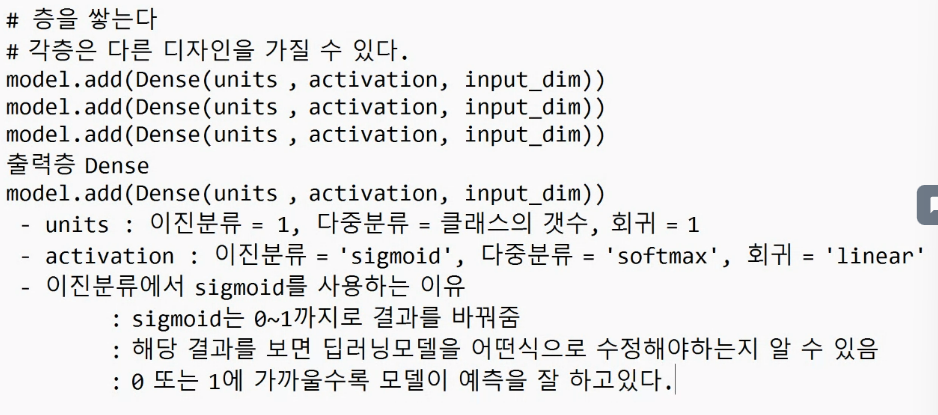

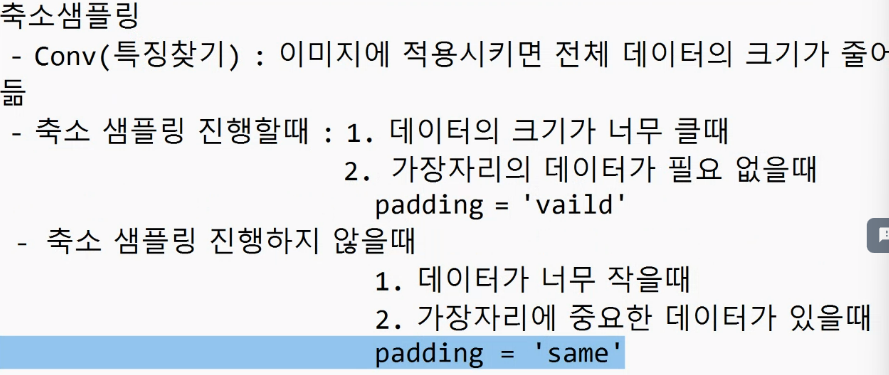

In [ ]:
# Dense 만 사용 = MUP
# Conv, Pool이 주로 사용된다 = CNN
# 딥러닝 모델 생성(CNN)
# 건물 토대 설계
model1 = Sequential()
# 입력층
model1.add(Conv2D( # 특징찾기
    filters=32, # 찾을 특징의 개수
    kernel_size = (3,3), # 특징의 크기
    input_shape= ( 150,150,3), # 입력데이터의 모양 (3 = RGB) # 0 : 검은색, 255 : 흰색
    activation = 'relu'
))

model1.add(MaxPool2D( # 특징이 아닌 부분 삭제하기
    pool_size = (2,2) # 기준 크기에서 1개의 특징만 가져오기 / 4개중에 1개 사용하기
))

model1.add(Conv2D( # 특징찾기
    filters=32, # 찾을 특징의 개수
    kernel_size = (3,3), # 특징의 크기
    activation = 'relu'
))

model1.add(MaxPool2D( # 특징이 아닌 부분 삭제하기
    pool_size = (2,2) # 기준 크기에서 1개의 특징만 가져오기 / 4개중에 1개 사용하기
))

######################## 특징 추출부 끝 #############################
model1.add(Flatten()) # 특징 추출부와 분류부를 이어주는 역할
####################### 분류 분석 시작 #####################
model1.add(Dense(units=32, activation='relu'))

# 출력층
model1.add(Dense(units=1, activation='sigmoid')) # 이진분류 - sigmoid

In [ ]:
# 학습 방법 설정
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
model1.fit(
    train_generator, # 학습 데이터(X_train, y_train이 합쳐져있다.)
    epochs = 20,
    validation_data = valid_generator
)

Epoch 1/20
20/20 [==============================] - 1132s 57s/step - loss: 0.9245 - accuracy: 0.5185 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/20
20/20 [==============================] - 11s 559ms/step - loss: 0.6919 - accuracy: 0.5160 - val_loss: 0.6869 - val_accuracy: 0.5030
Epoch 3/20
20/20 [==============================] - 9s 447ms/step - loss: 0.6680 - accuracy: 0.5730 - val_loss: 0.6623 - val_accuracy: 0.5580
Epoch 4/20
20/20 [==============================] - 10s 491ms/step - loss: 0.6107 - accuracy: 0.6755 - val_loss: 0.6259 - val_accuracy: 0.6340
Epoch 5/20
20/20 [==============================] - 9s 477ms/step - loss: 0.5550 - accuracy: 0.7160 - val_loss: 0.6056 - val_accuracy: 0.6790
Epoch 6/20
20/20 [==============================] - 9s 451ms/step - loss: 0.5008 - accuracy: 0.7620 - val_loss: 0.6111 - val_accuracy: 0.6850
Epoch 7/20
20/20 [==============================] - 9s 463ms/step - loss: 0.4175 - accuracy: 0.8100 - val_loss: 0.6266 - val_accuracy: 0.6820
Epo

In [ ]:
import PIL.Image as pimg
import cv2
# 이미지 불러오기
pre_img = cv2.imread('/content/suzy.jpg' ,cv2.IMREAD_COLOR)
# 이미지 색상 변경하기
pre_img = cv2.cvtColor(pre_img, cv2.COLOR_BGR2RGB)
# 이미지 크기 변경하기
pre_img = cv2.resize(pre_img,(150,150))
# 이미지 차원 변경하기
pre_img = pre_img.reshape((1,150,150,3))

In [ ]:
# 0 = cat
# 1 = dog
# 대다수의 사람이 개라는 결과를 얻는다 = 모델이 학습이 덜되서 개의 규칙은 잘 찾았지만 고양이의 규칙은 잘 찾지 못했기 때
model1.predict(pre_img)

1/1 [==============================] - 0s 162ms/step


array([[1.]], dtype=float32)

In [ ]:
# 부동소수점 : 소수점의 위치가 변하지 않는다
# 1.27 e -2 = 0.0127

In [ ]:
# train accuracy : 0.98
# val accuracy : 0.7
# >> train은 학습이 잘 됐고, val은 학습이 안됐다. -> 과대적합에 걸렸다
# 과대적합을 해소하는 방법
# 1. 데이터의 양을 늘린다(추가적으로 데이터 수집) > 많이 어렵다
# 2. 모델을 더 깊게 구성한다(층을 더 많이 쌓는다)
# 3. 데이터를 확장한다(가지고 있는 데이터를 다양하게 표현)

In [ ]:
# 데이터 확장을 하고 새롭게 학습한다
# 데이터를 확장하면 원본 데이터는 사라진다
# 모델 설계 > 확장 안 된 이미지로 학습 > 결과 확인 > 만족스럽지 않다 > 데이터 확장 후 학습

In [ ]:
# 기존 모델에 확장 데이터로 학습하기
aug_generator = ImageDataGenerator(
    rescale = 1./255, # 픽셀값 조정
    rotation_range = 20, # 회전 범위
    width_shift_range = 0.1, # 수평 이동
    height_shift_range=0.1, # 수직 이동
    shear_range = 0.1, # 반시계 방향 회전
    zoom_range=0.1, # 확대/축소 비율
    horizontal_flip = True, # 수평 뒤집기
    fill_mode = 'nearest' # 가까운 값으로 비어있는 곳을 채운다

)

In [ ]:
train_aug_generator = aug_generator.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 100,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [ ]:
model1.fit(
    train_aug_generator,
    epochs = 20,
    validation_data = valid_generator
)

Epoch 1/20
20/20 [==============================] - 21s 1s/step - loss: 0.7751 - accuracy: 0.6005 - val_loss: 0.6625 - val_accuracy: 0.6320
Epoch 2/20
20/20 [==============================] - 22s 1s/step - loss: 0.6417 - accuracy: 0.6330 - val_loss: 0.6335 - val_accuracy: 0.6350
Epoch 3/20
20/20 [==============================] - 21s 1s/step - loss: 0.6251 - accuracy: 0.6515 - val_loss: 0.6147 - val_accuracy: 0.6710
Epoch 4/20
20/20 [==============================] - 20s 1s/step - loss: 0.6105 - accuracy: 0.6685 - val_loss: 0.6104 - val_accuracy: 0.6760
Epoch 5/20
20/20 [==============================] - 22s 1s/step - loss: 0.6072 - accuracy: 0.6680 - val_loss: 0.5946 - val_accuracy: 0.6920
Epoch 6/20
20/20 [==============================] - 20s 1s/step - loss: 0.5883 - accuracy: 0.6900 - val_loss: 0.5774 - val_accuracy: 0.7010
Epoch 7/20
20/20 [==============================] - 20s 1s/step - loss: 0.5670 - accuracy: 0.7030 - val_loss: 0.5727 - val_accuracy: 0.7040
Epoch 8/20
20/20 [==

# 과대적합을 줄이는 방법들
  - 증식
    - 장점 : 간단
    - 단점 : 가짜는 가짜다 (급격한 성능향상은 없다)
    - epoch 수는 증가시켜주어야 한다
  - Dropout()
    - 층에 사용하는 퍼셉트론의 수를 설정한 비율만큼 사용하지 않는 방법
    - epoch마다 사용하지 않는 퍼셉트론은 랜덤
  - BatchNormalization()
    - CNN층 = Conv (특성추출) + Maxpooling (크기축소)
    - Conv층의 파라미터를 정규화 (평균 0, 분산 1)
      -> 음수가 발생
      -> relu를 적용하면
      -> 음수가 사라지는 문제 -> leaky relu
  - GlobalAveragePooling2D()
    - CNN에서 가장 문제가 되는 층 : Maxpooling층
      -> CNN 속도의 60% 이상을 차지
    - Maxpooling2D + Flatten()
    - Dense 층과 연결되는 층에 사용

- Data Generator : 학습시킬 때 한번에 전체 데이터를 가져오는 것이 아니라 batch_size만큼씩만 가져와서 처리하도록 하는 것 (메모리 자원 부족 문제를 해결)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(rescale = 1./255)

# 하나의 변수에 이미지 파일 전부 다 합치기
# 이미지 크기 동일하게 만들어주기
# 라벨링
train_generator = generator.flow_from_directory(
    directory = train_dir, # train 이미지 경로, 변환할 이미지
    target_size = (150,150), # 변환활 이미지 크기
    batch_size = 100, # 한번에 변환할 이미지 개수
    class_mode = 'binary' # 라벨링 방법, 다중분류 : categorical
)

valid_generator = generator.flow_from_directory(
    directory = valid_dir, # train 이미지 경로, 변환할 이미지
    target_size = (150,150), # 변환활 이미지 크기
    batch_size = 100, # 한번에 변환할 이미지 개수
    class_mode = 'binary' # 라벨링 방법, 다중분류 : categorical
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# 라벨은 알파벳 순으로 0부터 부여됨
train_generator.class_indices, valid_generator.class_indices

({'cats': 0, 'dogs': 1}, {'cats': 0, 'dogs': 1})

In [ ]:
# CNN 모델 설계
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization, GlobalAveragePooling3D

# Dense 만 사용 = MUP
# Conv, Pool이 주로 사용된다 = CNN
# 딥러닝 모델 생성(CNN)
# 건물 토대 설계
model1 = Sequential()
# 입력층
model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    input_shape = (150,150,3), activation = 'relu'))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    activation = 'relu'))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    activation = 'relu'))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 128, kernel_size = (3,3),
    activation = 'relu'))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 64, kernel_size = (3,3),
    activation = 'relu'))
model1.add(MaxPool2D( pool_size = (2,2)))


######################## 특징 추출부 끝 #############################
model1.add(Flatten()) # 특징 추출부와 분류부를 이어주는 역할
####################### 분류 분석 시작 #####################
model1.add(Dropout(0.5))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 128, activation = 'relu'))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 32, activation = 'relu'))


# 출력층
model1.add(Dense(units=1, activation='sigmoid')) # 이진분류 - sigmoid

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 32)        0

In [ ]:
# 학습 방법 설정
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
model1.fit(
    train_generator, # 학습 데이터(X_train, y_train이 합쳐져있다.)
    epochs = 20,
    validation_data = valid_generator
)

Epoch 1/20
20/20 [==============================] - 17s 511ms/step - loss: 0.6939 - accuracy: 0.4895 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 2/20
20/20 [==============================] - 10s 492ms/step - loss: 0.6912 - accuracy: 0.5180 - val_loss: 0.6905 - val_accuracy: 0.5000
Epoch 3/20
20/20 [==============================] - 11s 565ms/step - loss: 0.6869 - accuracy: 0.5615 - val_loss: 0.6828 - val_accuracy: 0.5100
Epoch 4/20
20/20 [==============================] - 9s 477ms/step - loss: 0.6829 - accuracy: 0.5725 - val_loss: 0.6791 - val_accuracy: 0.6070
Epoch 5/20
20/20 [==============================] - 10s 482ms/step - loss: 0.6705 - accuracy: 0.6120 - val_loss: 0.6496 - val_accuracy: 0.6100
Epoch 6/20
20/20 [==============================] - 11s 557ms/step - loss: 0.6420 - accuracy: 0.6285 - val_loss: 0.6137 - val_accuracy: 0.6680
Epoch 7/20
20/20 [==============================] - 12s 597ms/step - loss: 0.6214 - accuracy: 0.6615 - val_loss: 0.6010 - val_accuracy: 0.6650


 GlobalAveragePooling2D

In [ ]:
# CNN 모델 설계
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization, GlobalAveragePooling2D

# Dense 만 사용 = MUP
# Conv, Pool이 주로 사용된다 = CNN
# 딥러닝 모델 생성(CNN)
# 건물 토대 설계
model1 = Sequential()
# 입력층
model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    input_shape = (150,150,3), activation = 'relu'))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    activation = 'relu'))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    activation = 'relu'))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 128, kernel_size = (3,3),
    activation = 'relu'))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 64, kernel_size = (3,3),
    activation = 'relu'))
# model1.add(MaxPool2D( pool_size = (2,2)))


######################## 특징 추출부 끝 #############################
# model1.add(Flatten()) # 특징 추출부와 분류부를 이어주는 역할

model1.add(GlobalAveragePooling2D())
####################### 분류 분석 시작 #####################
model1.add(Dropout(0.5))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 128, activation = 'relu'))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 32, activation = 'relu'))


# 출력층
model1.add(Dense(units=1, activation='sigmoid')) # 이진분류 - sigmoid

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 17, 17, 32)       

In [ ]:
# 학습 방법 설정
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
model1.fit(
    train_generator, # 학습 데이터(X_train, y_train이 합쳐져있다.)
    epochs = 20,
    validation_data = valid_generator
)

Epoch 1/20
20/20 [==============================] - 14s 441ms/step - loss: 0.6933 - accuracy: 0.4995 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 2/20
20/20 [==============================] - 12s 599ms/step - loss: 0.6905 - accuracy: 0.5285 - val_loss: 0.6821 - val_accuracy: 0.5730
Epoch 3/20
20/20 [==============================] - 9s 479ms/step - loss: 0.6820 - accuracy: 0.5660 - val_loss: 0.6874 - val_accuracy: 0.5390
Epoch 4/20
20/20 [==============================] - 9s 460ms/step - loss: 0.6747 - accuracy: 0.5845 - val_loss: 0.6467 - val_accuracy: 0.6480
Epoch 5/20
20/20 [==============================] - 9s 439ms/step - loss: 0.6501 - accuracy: 0.6360 - val_loss: 0.6224 - val_accuracy: 0.6660
Epoch 6/20
20/20 [==============================] - 9s 475ms/step - loss: 0.6304 - accuracy: 0.6475 - val_loss: 0.6128 - val_accuracy: 0.6720
Epoch 7/20
20/20 [==============================] - 9s 472ms/step - loss: 0.6050 - accuracy: 0.6805 - val_loss: 0.6005 - val_accuracy: 0.6830
Epoc

- BatchNormalization()
  - Conv2D()와 Activation()층 사이에 배치
  - Activation()이 정규화기능을 일부 수행 -> Activation()다음에 배치하면 효과가 떨어짐 -> C + B + A + M => C + A + B + M

  - 확실하게 성능이 향상
  - 단점 : 왜 좋아지는지 정확히 수학적으로 설명할 수 없음

In [ ]:
# CNN 모델 설계
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation
# Dense 만 사용 = MUP
# Conv, Pool이 주로 사용된다 = CNN
# 딥러닝 모델 생성(CNN)
# 건물 토대 설계
model1 = Sequential()
# 입력층
model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    input_shape = (150,150,3)))
model1.add(BatchNormalization())
model1.add(Activation("leaky_relu")) # 원래의 방법은 activation 따로 적는다
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    activation = 'leaky_relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    activation = 'leaky_relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 128, kernel_size = (3,3),
    activation = 'leaky_relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 64, kernel_size = (3,3),
    activation = 'leaky_relu'))
model1.add(BatchNormalization())
# model1.add(MaxPool2D( pool_size = (2,2)))


######################## 특징 추출부 끝 #############################
# model1.add(Flatten()) # 특징 추출부와 분류부를 이어주는 역할

model1.add(GlobalAveragePooling2D())
####################### 분류 분석 시작 #####################
model1.add(Dropout(0.5))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 128, activation = 'relu'))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 32, activation = 'relu'))


# 출력층
model1.add(Dense(units=1, activation='sigmoid')) # 이진분류 - sigmoid

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_5 (Bat  (None, 148, 148, 32)      128       
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 batch_normalization_6 (Bat  (None, 72, 72, 32)       

In [ ]:
# 학습 방법 설정
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
model1.fit(
    train_generator, # 학습 데이터(X_train, y_train이 합쳐져있다.)
    epochs = 20,
    validation_data = valid_generator
)

Epoch 1/20
20/20 [==============================] - 15s 497ms/step - loss: 0.6639 - accuracy: 0.6085 - val_loss: 0.7083 - val_accuracy: 0.5000
Epoch 2/20
20/20 [==============================] - 9s 455ms/step - loss: 0.6118 - accuracy: 0.6675 - val_loss: 0.7404 - val_accuracy: 0.5000
Epoch 3/20
20/20 [==============================] - 9s 460ms/step - loss: 0.5780 - accuracy: 0.7085 - val_loss: 0.9769 - val_accuracy: 0.5000
Epoch 4/20
20/20 [==============================] - 10s 485ms/step - loss: 0.5463 - accuracy: 0.7400 - val_loss: 1.2262 - val_accuracy: 0.5000
Epoch 5/20
20/20 [==============================] - 9s 475ms/step - loss: 0.5208 - accuracy: 0.7585 - val_loss: 1.4270 - val_accuracy: 0.5000
Epoch 6/20
20/20 [==============================] - 9s 446ms/step - loss: 0.4877 - accuracy: 0.7735 - val_loss: 1.3422 - val_accuracy: 0.5000
Epoch 7/20
20/20 [==============================] - 9s 464ms/step - loss: 0.4724 - accuracy: 0.7865 - val_loss: 1.4090 - val_accuracy: 0.5000
Epoc

# 전이학습 (Transfer Learning)
   - 미리 학습된 모델이나 가중치를 가져다 쓰는 기법

   
   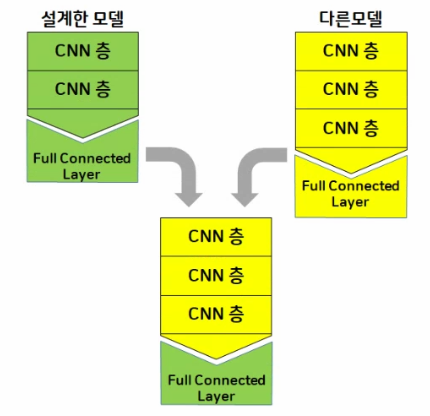

- 전이학습을 하는 이유
  - 데이터가 부족
  - 설계한 신경망이 그닥 좋지 못하다
- 전이학습의 종류
  - 특성추출 : CNN층의 가중치를 그대로 사용
  - 미세조정 (fine turning) : CNN층의 가중치를 일부 살짝 변형해서 사용

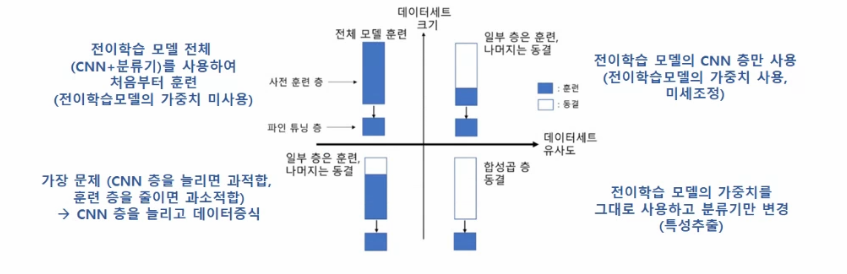